In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline

# Helps convert json to panda
from pandas.io.json import json_normalize

In [2]:
with open('train.json') as json_data:
    train = json.load(json_data)
    
with open('test.json') as json_data:
    test = json.load(json_data)

In [3]:
# Convert Json to DF
train = pd.DataFrame.from_dict(json_normalize(train), orient='columns')
test = pd.DataFrame.from_dict(json_normalize(test), orient='columns')
trainIndex = train.index
testIndex = test.index

In [4]:
# We have 3 variables: cusine, id and ingridients
# We try to predict cuisine from ingredients
# All categorial values no continuous variables
data = pd.concat([train,test],sort=False)

In [5]:
data.tail()

,cuisine,id,ingredients
9939,NaN,30246,"[large egg yolks, fresh lemon juice, sugar, bo..."
9940,NaN,36028,"[hot sauce, butter, sweet potatoes, adobo sauc..."
9941,NaN,22339,"[black pepper, salt, parmigiano reggiano chees..."
9942,NaN,42525,"[cheddar cheese, cayenne, paprika, plum tomato..."
9943,NaN,1443,"[cold water, olive oil, lime wedges, garlic cl..."


In [6]:
data['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [7]:
data['cuisine'].value_counts().index

Index(['italian', 'mexican', 'southern_us', 'indian', 'chinese', 'french',
       'cajun_creole', 'thai', 'japanese', 'greek', 'spanish', 'korean',
       'vietnamese', 'moroccan', 'british', 'filipino', 'irish', 'jamaican',
       'russian', 'brazilian'],
      dtype='object')

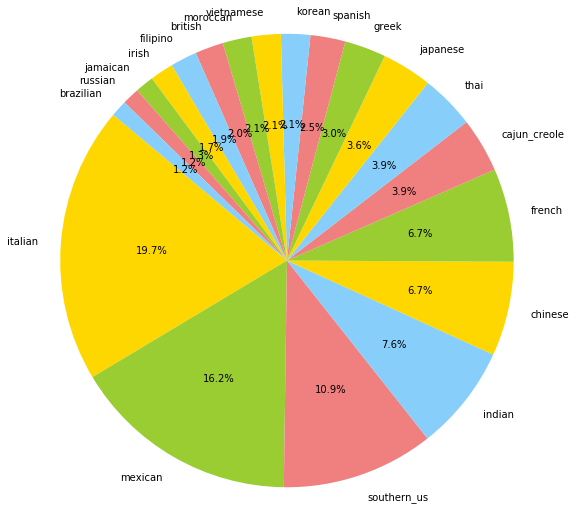

In [8]:
# Data to plot
labels = data['cuisine'].value_counts().index
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plots the distribution of different cuisine
plt.figure(figsize=(9,9))
plt.pie(train['cuisine'].value_counts(),labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.show()

In [9]:
data['#OfIng'] = data['ingredients'].map(lambda x: len(x))
data.tail()

,cuisine,id,ingredients,#OfIng
9939,NaN,30246,"[large egg yolks, fresh lemon juice, sugar, bo...",9
9940,NaN,36028,"[hot sauce, butter, sweet potatoes, adobo sauc...",5
9941,NaN,22339,"[black pepper, salt, parmigiano reggiano chees...",8
9942,NaN,42525,"[cheddar cheese, cayenne, paprika, plum tomato...",15
9943,NaN,1443,"[cold water, olive oil, lime wedges, garlic cl...",18


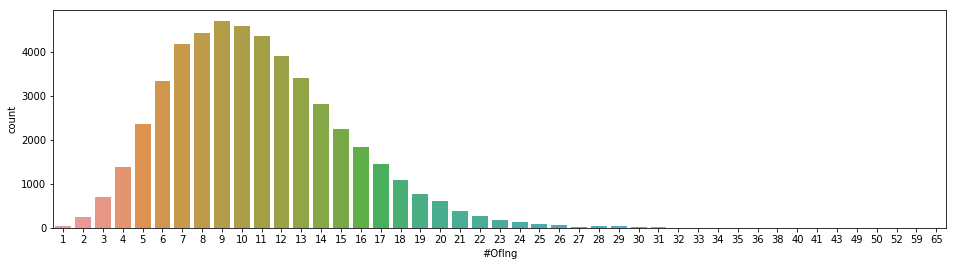

In [10]:
plt.figure(figsize=(16,4))
sns.countplot(x="#OfIng", data=data)

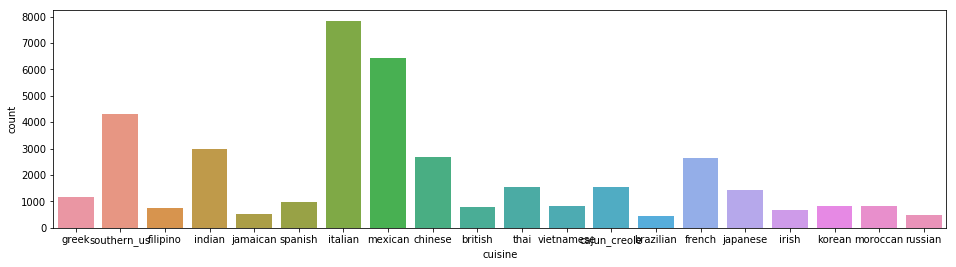

In [11]:
plt.figure(figsize=(16,4))
sns.countplot(x='cuisine', data=data)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(tokenizer=lambda x:[i.strip() for i in x.split(',')], lowercase=False)
dummy_var = vector.fit_transform(data['ingredients'].apply(','.join))

In [13]:
df = pd.DataFrame(dummy_var.todense(), columns=vector.get_feature_names())

In [14]:
data.drop(columns='ingredients', inplace=True)

In [15]:
X = df.loc[trainIndex, :]
#X['#'] = data.loc[:train.shape[0]-1]['#OfIng'].copy(deep=True)
X_test = df.loc[testIndex,:]
#X_test['#'] = data.loc[test.shape[0]:]['#OfIng'].copy(deep=True)
Y = train['cuisine']

del data, df, dummy_var, vector

In [16]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
predict = clf.predict(X_test)

In [21]:
submission_df = pd.Series(predict, index=test['id']).rename('cuisine')
submission_df.to_csv("logistic_sub.csv", index=True, header=True)
print(submission_df.head())

id
18009          greek
28583    southern_us
41580       filipino
29752         indian
35687         indian
Name: cuisine, dtype: object
